#### Plotting Gini Index for some values of f and the Lorenz Curve

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline
plt.style.use('default')

In [2]:
filepath = os.path.join(os.getcwd(), "data/1_basic_results")
filepath2 = os.path.join(os.getcwd(), "data/2_add_geo_graphs")

figpath = os.path.join(filepath, 'figs')
figpath2 = os.path.join(filepath2, 'figs')

f_set = [0, .05, .1, .2, .3, .4, .5]

### Ginis for GTG with $k\approx 4$
#### 1. Compare with mean field

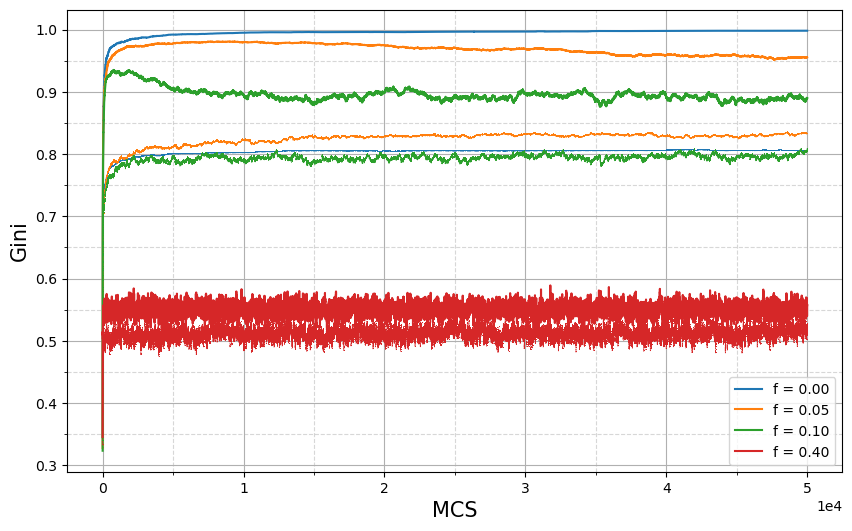

In [32]:
# Gini
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('Gini', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)

for f in f_set:
    path_gini = os.path.join(filepath, 'f={:.2f}_gini.npy'.format(f))
    path_gini2 = os.path.join(filepath2, 'GTG_theta=1500_MCS=50000_f={:.2f}_gini.npy'.format(f))
    gini = np.load(path_gini)
    gini2 = np.load(path_gini2)

    color = next(ax._get_lines.prop_cycler)['color']

    ax.plot(gini[:50000], label='f = {:.2f}'.format(f), color=color)
    ax.plot(gini2, marker=',', color=color, linestyle='-.', 
            linewidth=.5, markersize=.3)
    
    ax.ticklabel_format(axis='x', style='scientific', scilimits=(4,4))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

#fig.savefig(os.path.join(figpath, 'ginis'), format='png')


#### 2. Gini Mean field

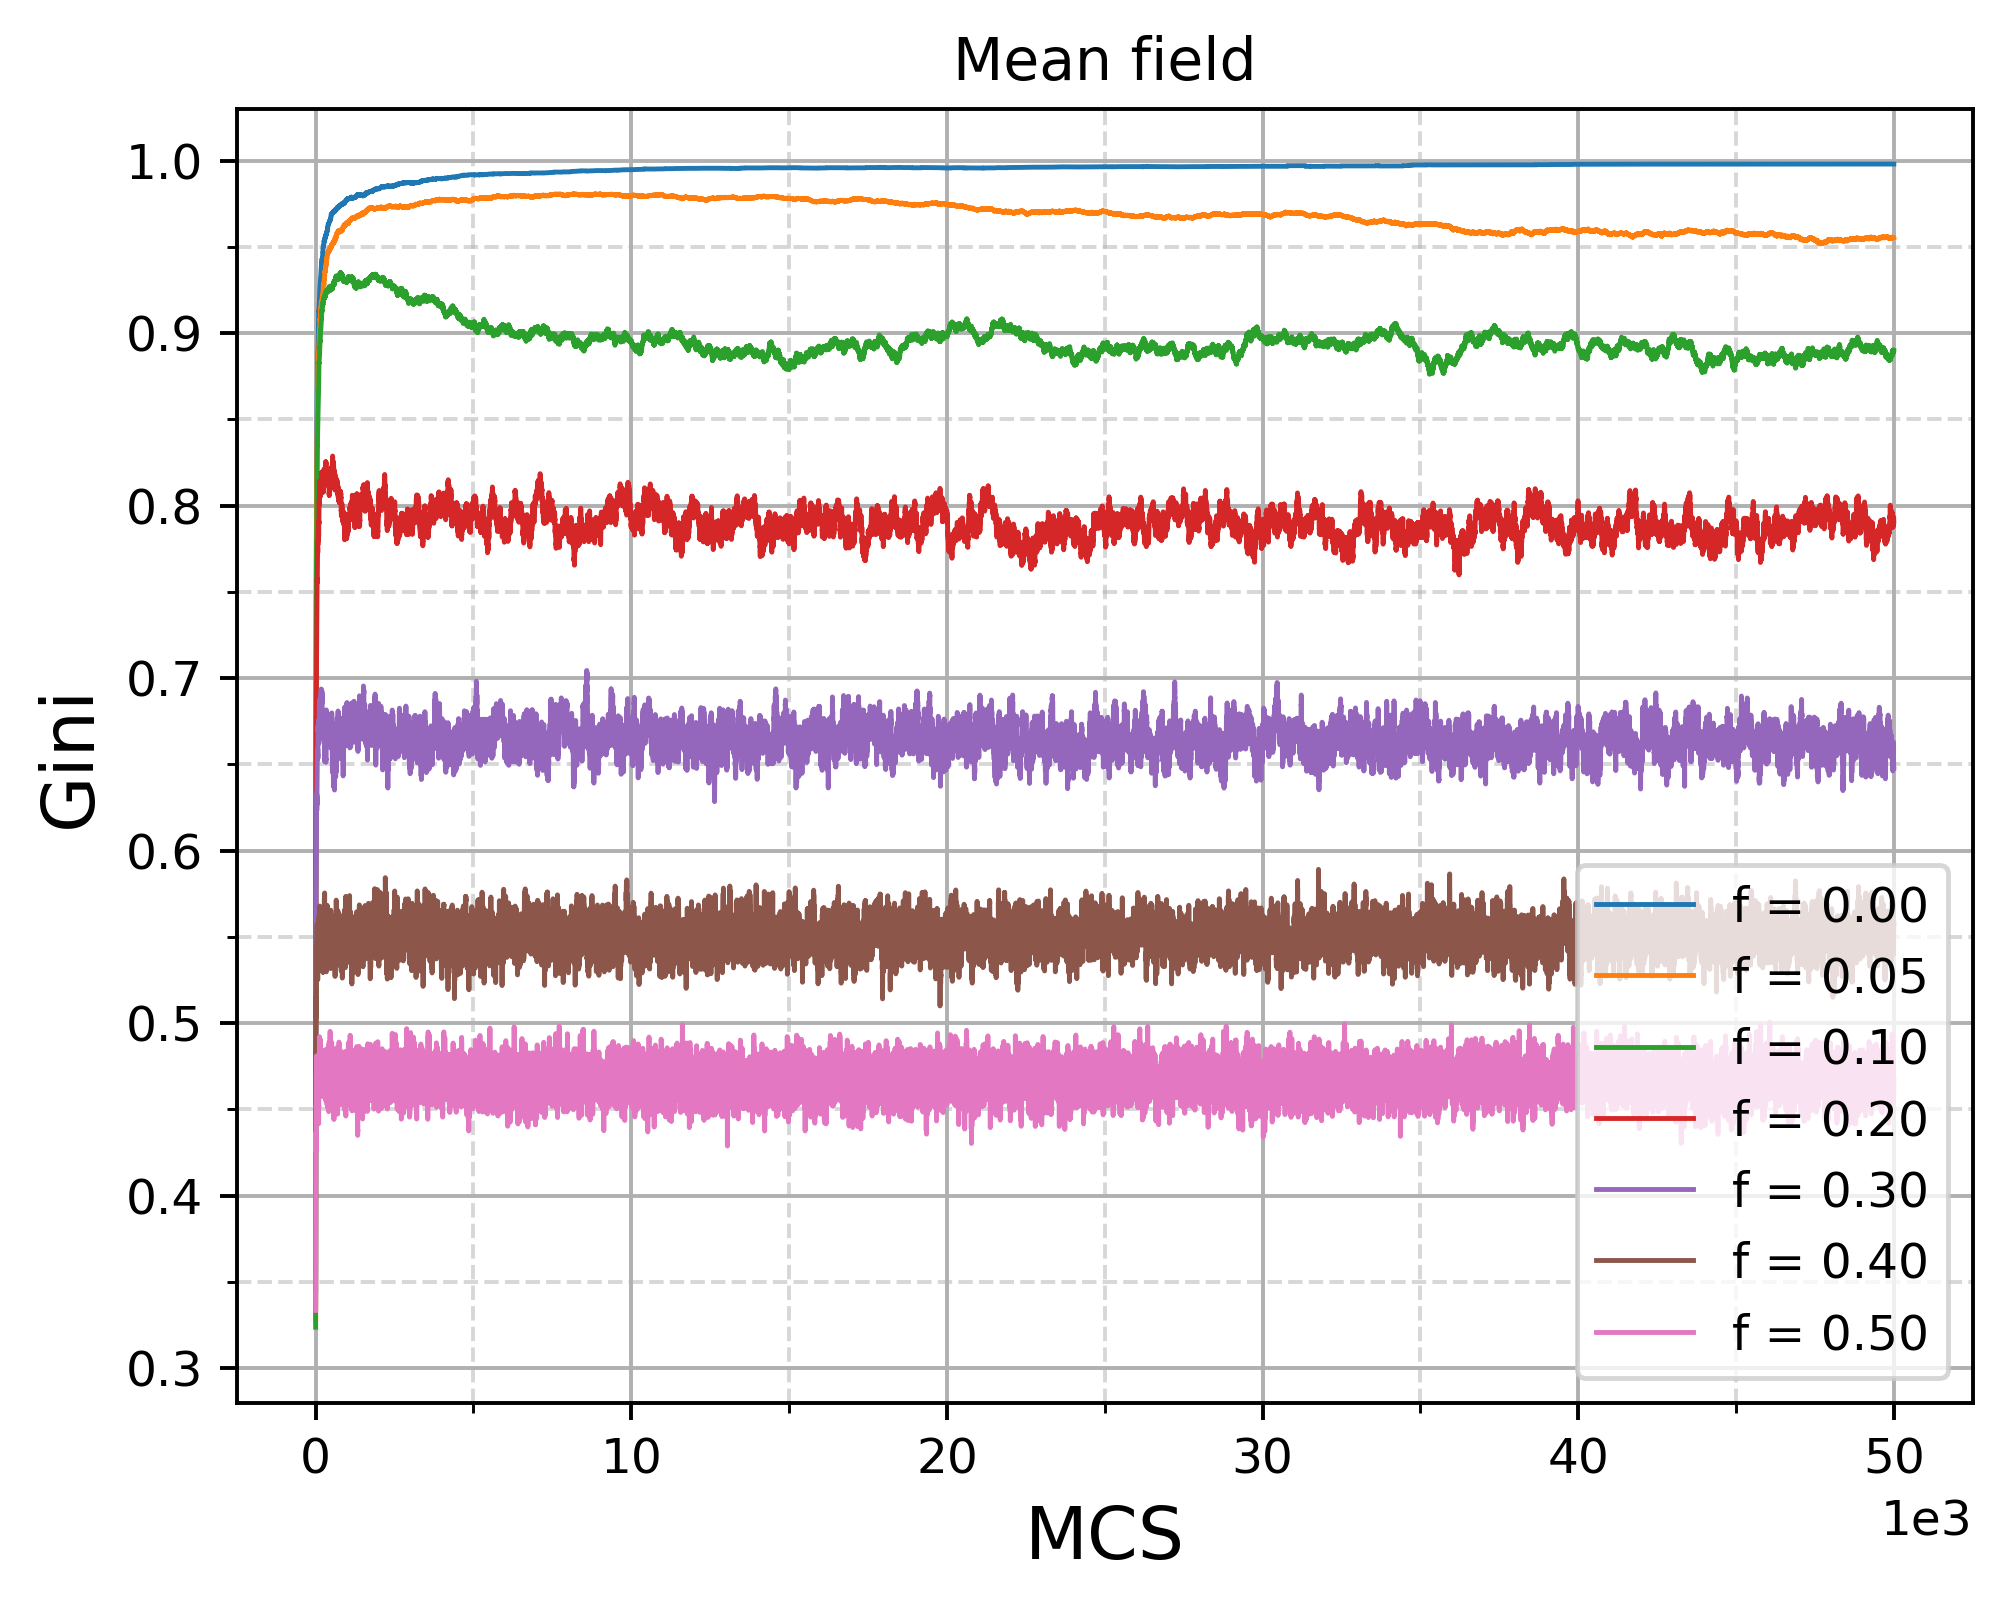

In [3]:
# Gini
fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('Gini', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
ax.set_ylim(.28, 1.03)
ax.set_title(label='Mean field')

for f in f_set:
    path_gini = os.path.join(filepath, 'f={:.2f}_gini.npy'.format(f))
    gini = np.load(path_gini)

    ax.plot(gini[:50000], label='f = {:.2f}'.format(f), linewidth=1)
    
    ax.legend()
    ax.ticklabel_format(axis='x', style='scientific', scilimits=(3,3))
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath2, 'ginisMF.png'), format='png')

#### 3. Gini GTG $\,\,n=1000, \theta=1500$

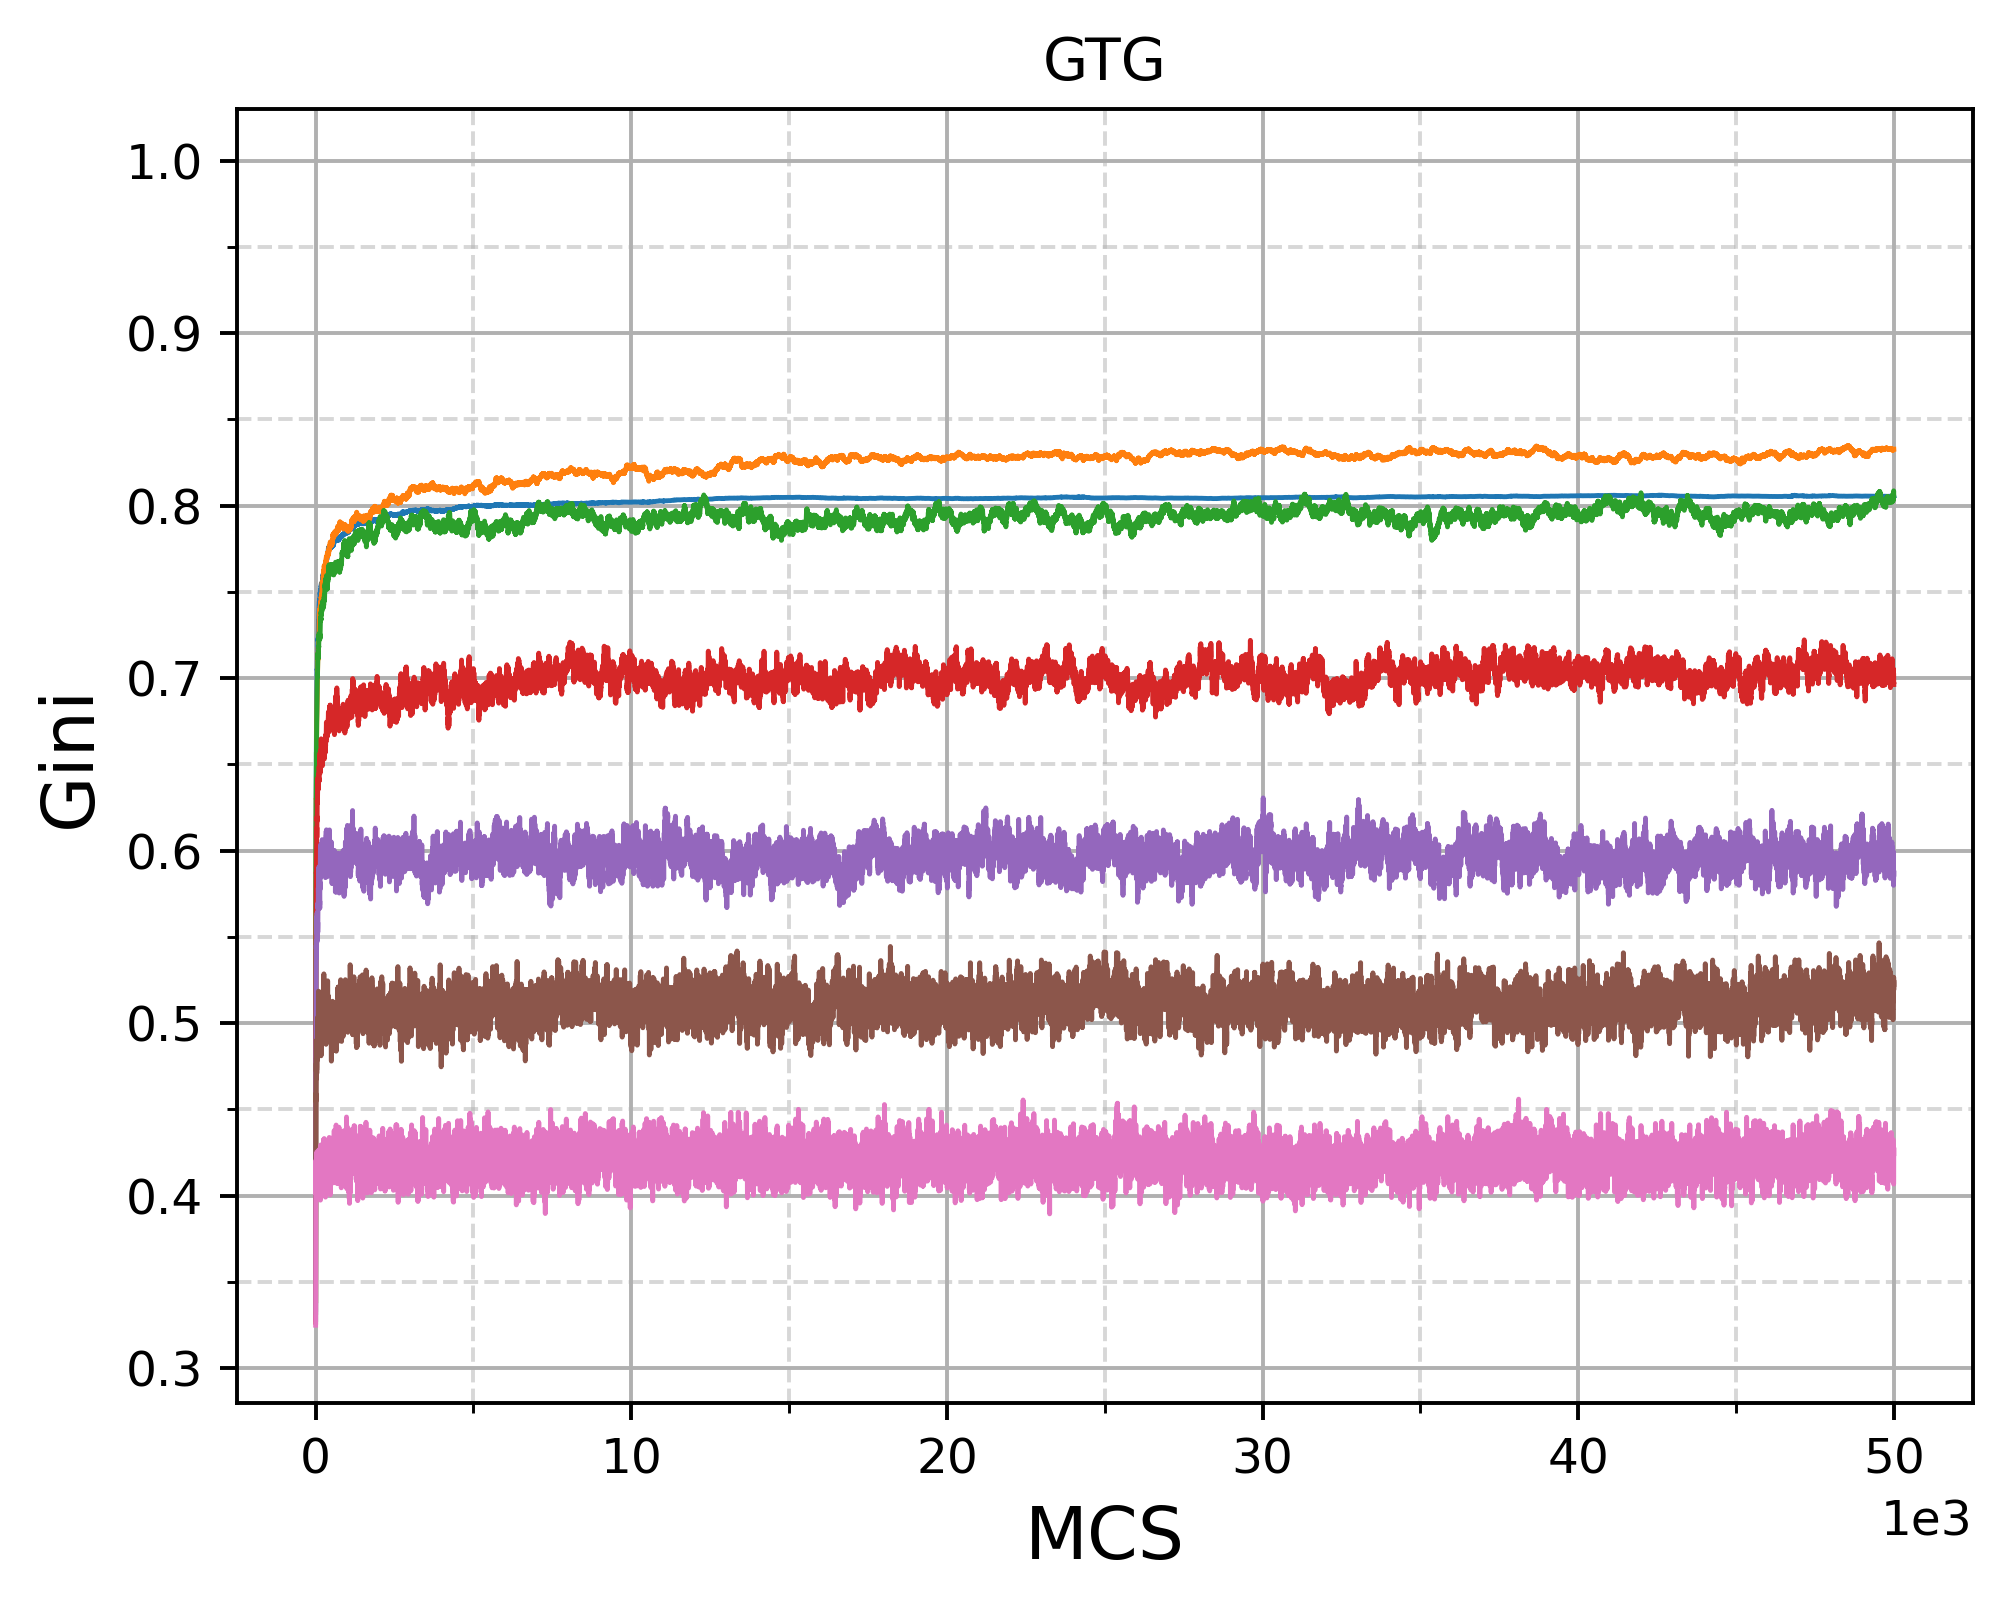

In [4]:
# Gini
fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('Gini', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
ax.set_ylim(.28, 1.03)
ax.set_title(label='GTG')

for f in f_set:
    path_gini = os.path.join(filepath2, 'GTG_theta=1500_MCS=50000_f={:.2f}_gini.npy'.format(f))
    gini = np.load(path_gini)

    ax.plot(gini, label='f = {:.2f}'.format(f), linewidth=1)
    ax.ticklabel_format(axis='x', style='scientific', scilimits=(3,3))
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath2, 'ginisGTG.png'), format='png')


#### 4. Gini BA

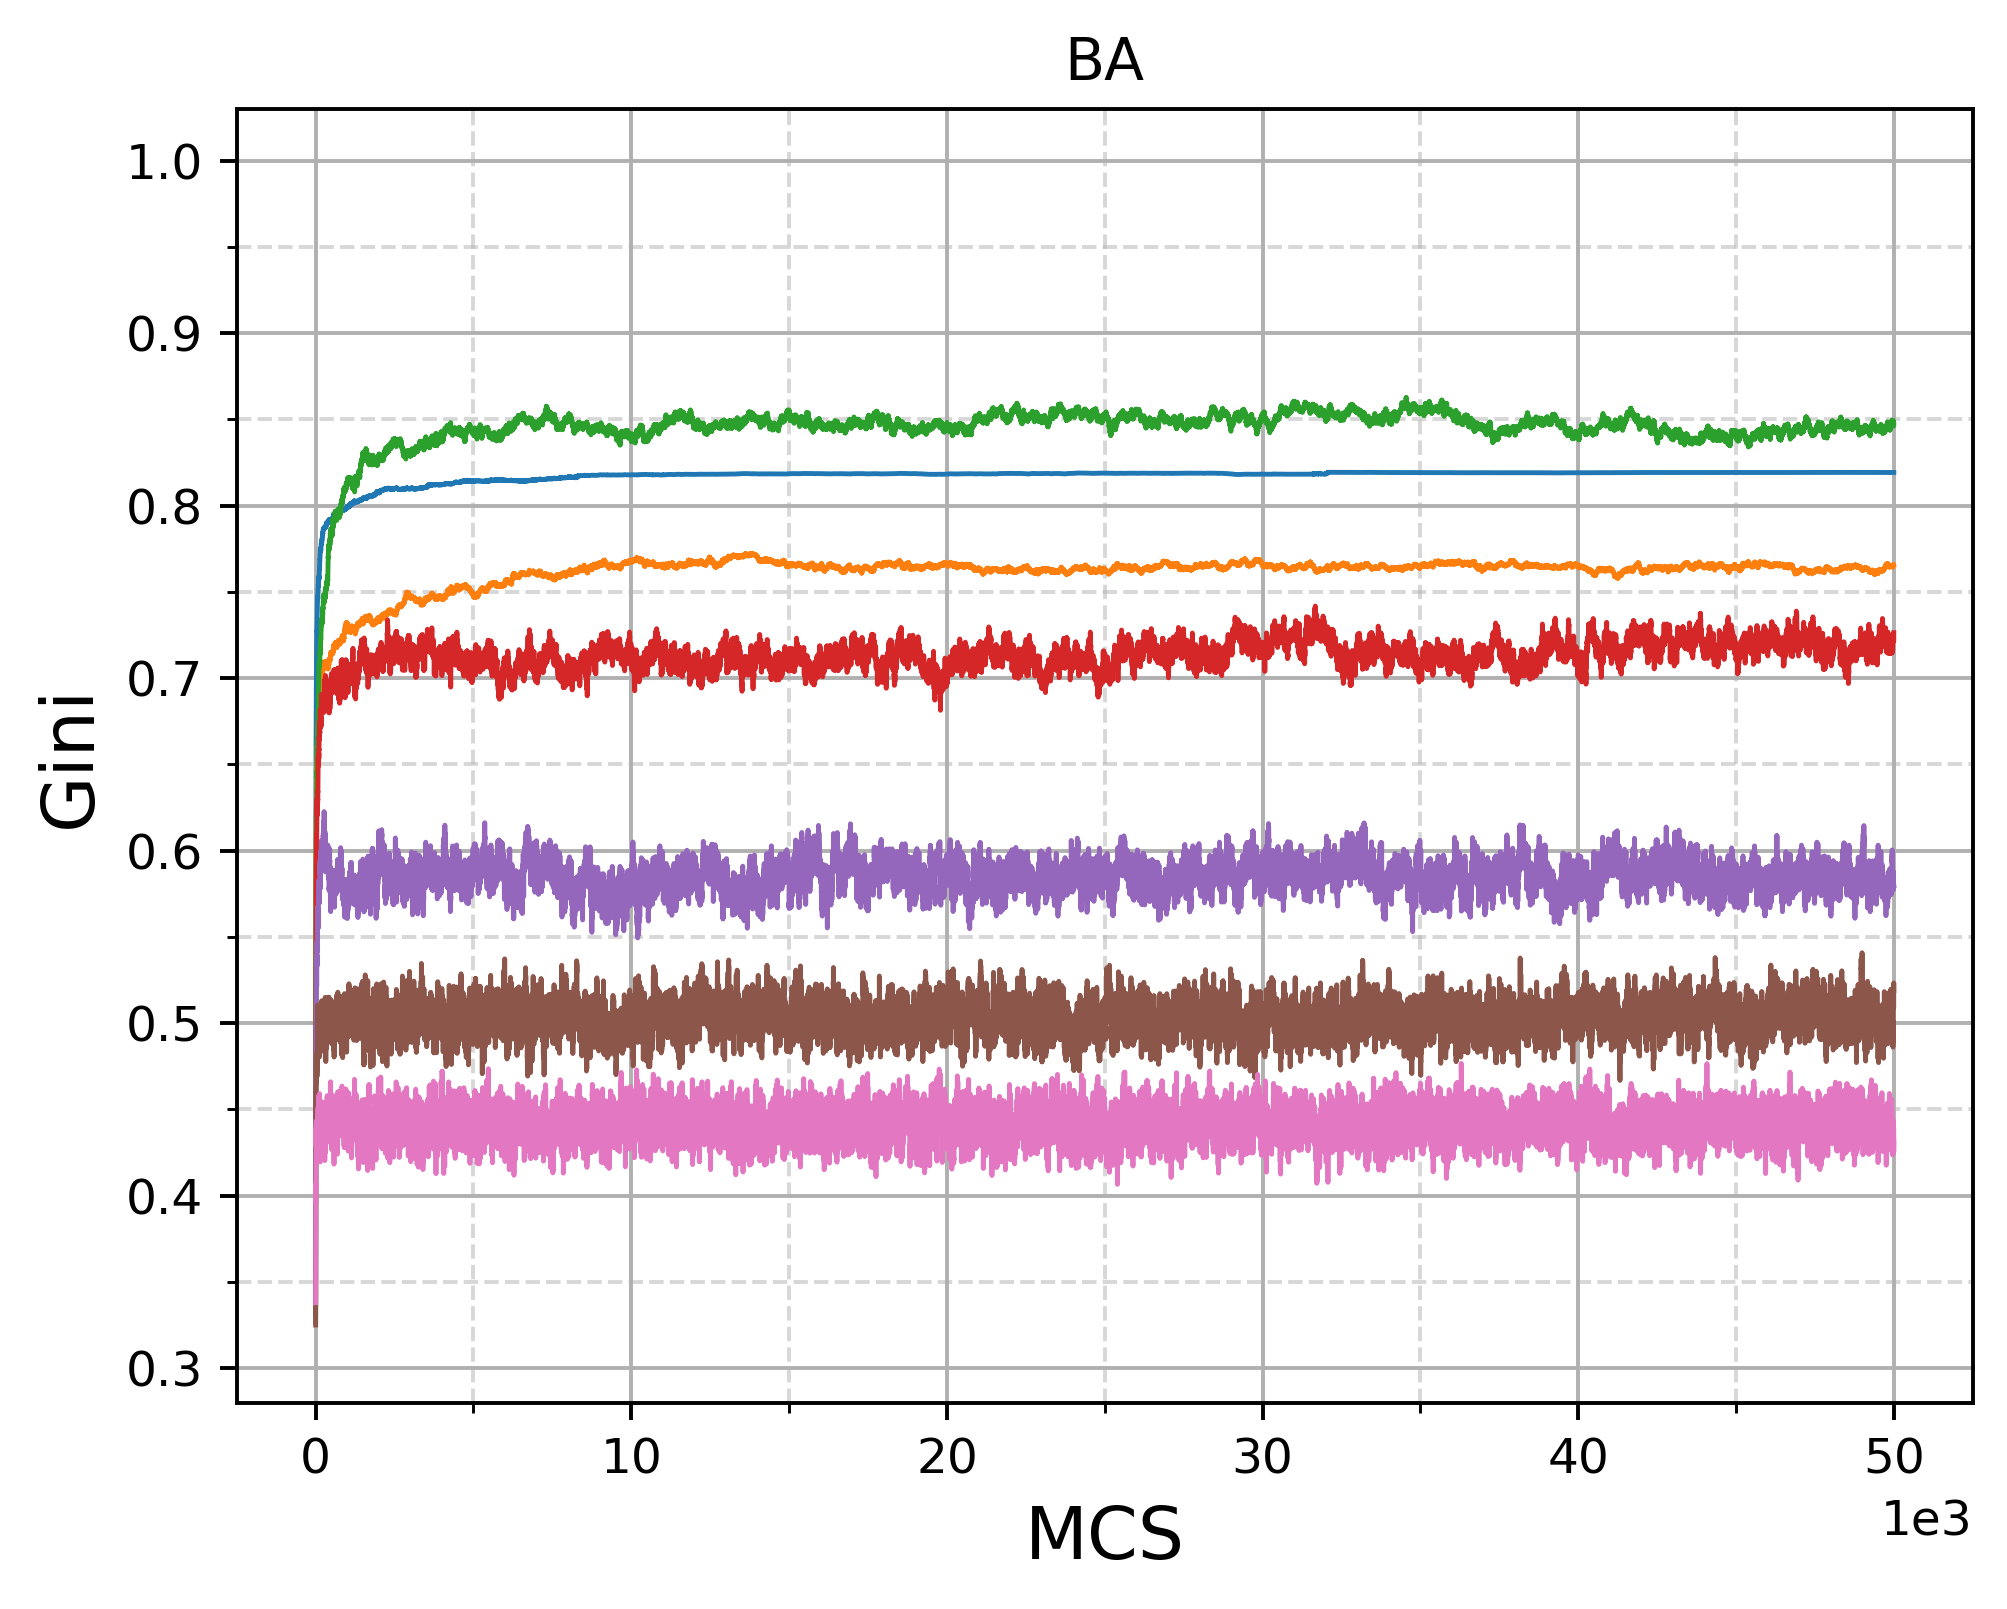

In [5]:
# Gini
fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('Gini', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
ax.set_ylim(.28, 1.03)
ax.set_title(label='BA')

for f in f_set:
    path_gini = os.path.join(filepath2, 'BA_m=2_MCS=50000_f={:.2f}_gini.npy'.format(f))
    gini = np.load(path_gini)

    ax.plot(gini, label='f = {:.2f}'.format(f), linewidth=1)
    ax.ticklabel_format(axis='x', style='scientific', scilimits=(3,3))
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath2, 'ginisBA.png'), format='png')

### Lorenz curves

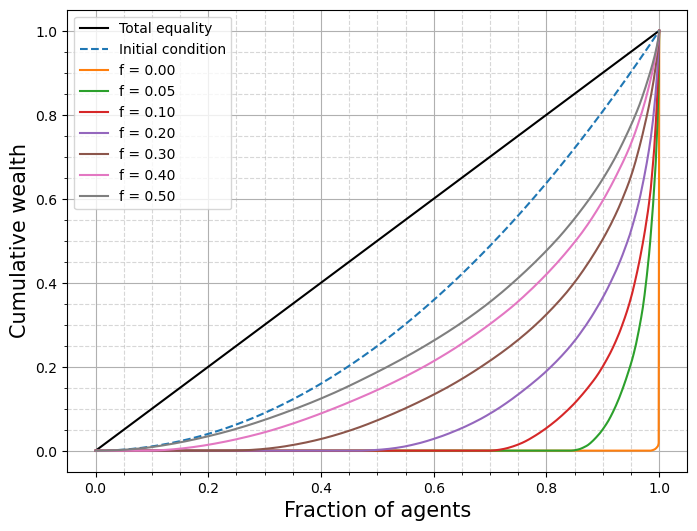

In [3]:
# Lorenz Curve
#f_set = [0, .05, .1, .2, .3, .4, .5]

fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_ylabel('Cumulative wealth', size=15)
ax.set_xlabel('Fraction of agents', size=15)
ax.set_xticks(np.arange(0, 1.05, .05), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
# Plot gini=0 curve
ax.plot([0,1], [0,1], color='k', label='Total equality')
# Plot uniform distribution curve
agent = np.random.rand(10000)
# Normalize wealth
agent /= np.sum(agent)
agent = np.sort(agent)

ax.plot(np.linspace(0, 1, agent.shape[0]), np.cumsum(agent)/np.sum(agent), 
        label='Initial condition'.format(f), linestyle='--')

for f in f_set:
    path_agents = os.path.join(filepath, 'f={:.2f}_agents.npy'.format(f))
    agent = np.load(path_agents)
    agent = np.sort(agent)

    ax.plot(np.linspace(0, 1, agent.shape[0]), np.cumsum(agent)/np.sum(agent), 
            label='f = {:.2f}'.format(f))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

    path_agents = os.path.join(filepath, 'f={:.2f}_agents.npy'.format(f))

plt.show()

#fig.savefig(os.path.join(figpath, 'lorenz_curve'), format='png')

### Active agents

#### 1. Mean field vs GTG

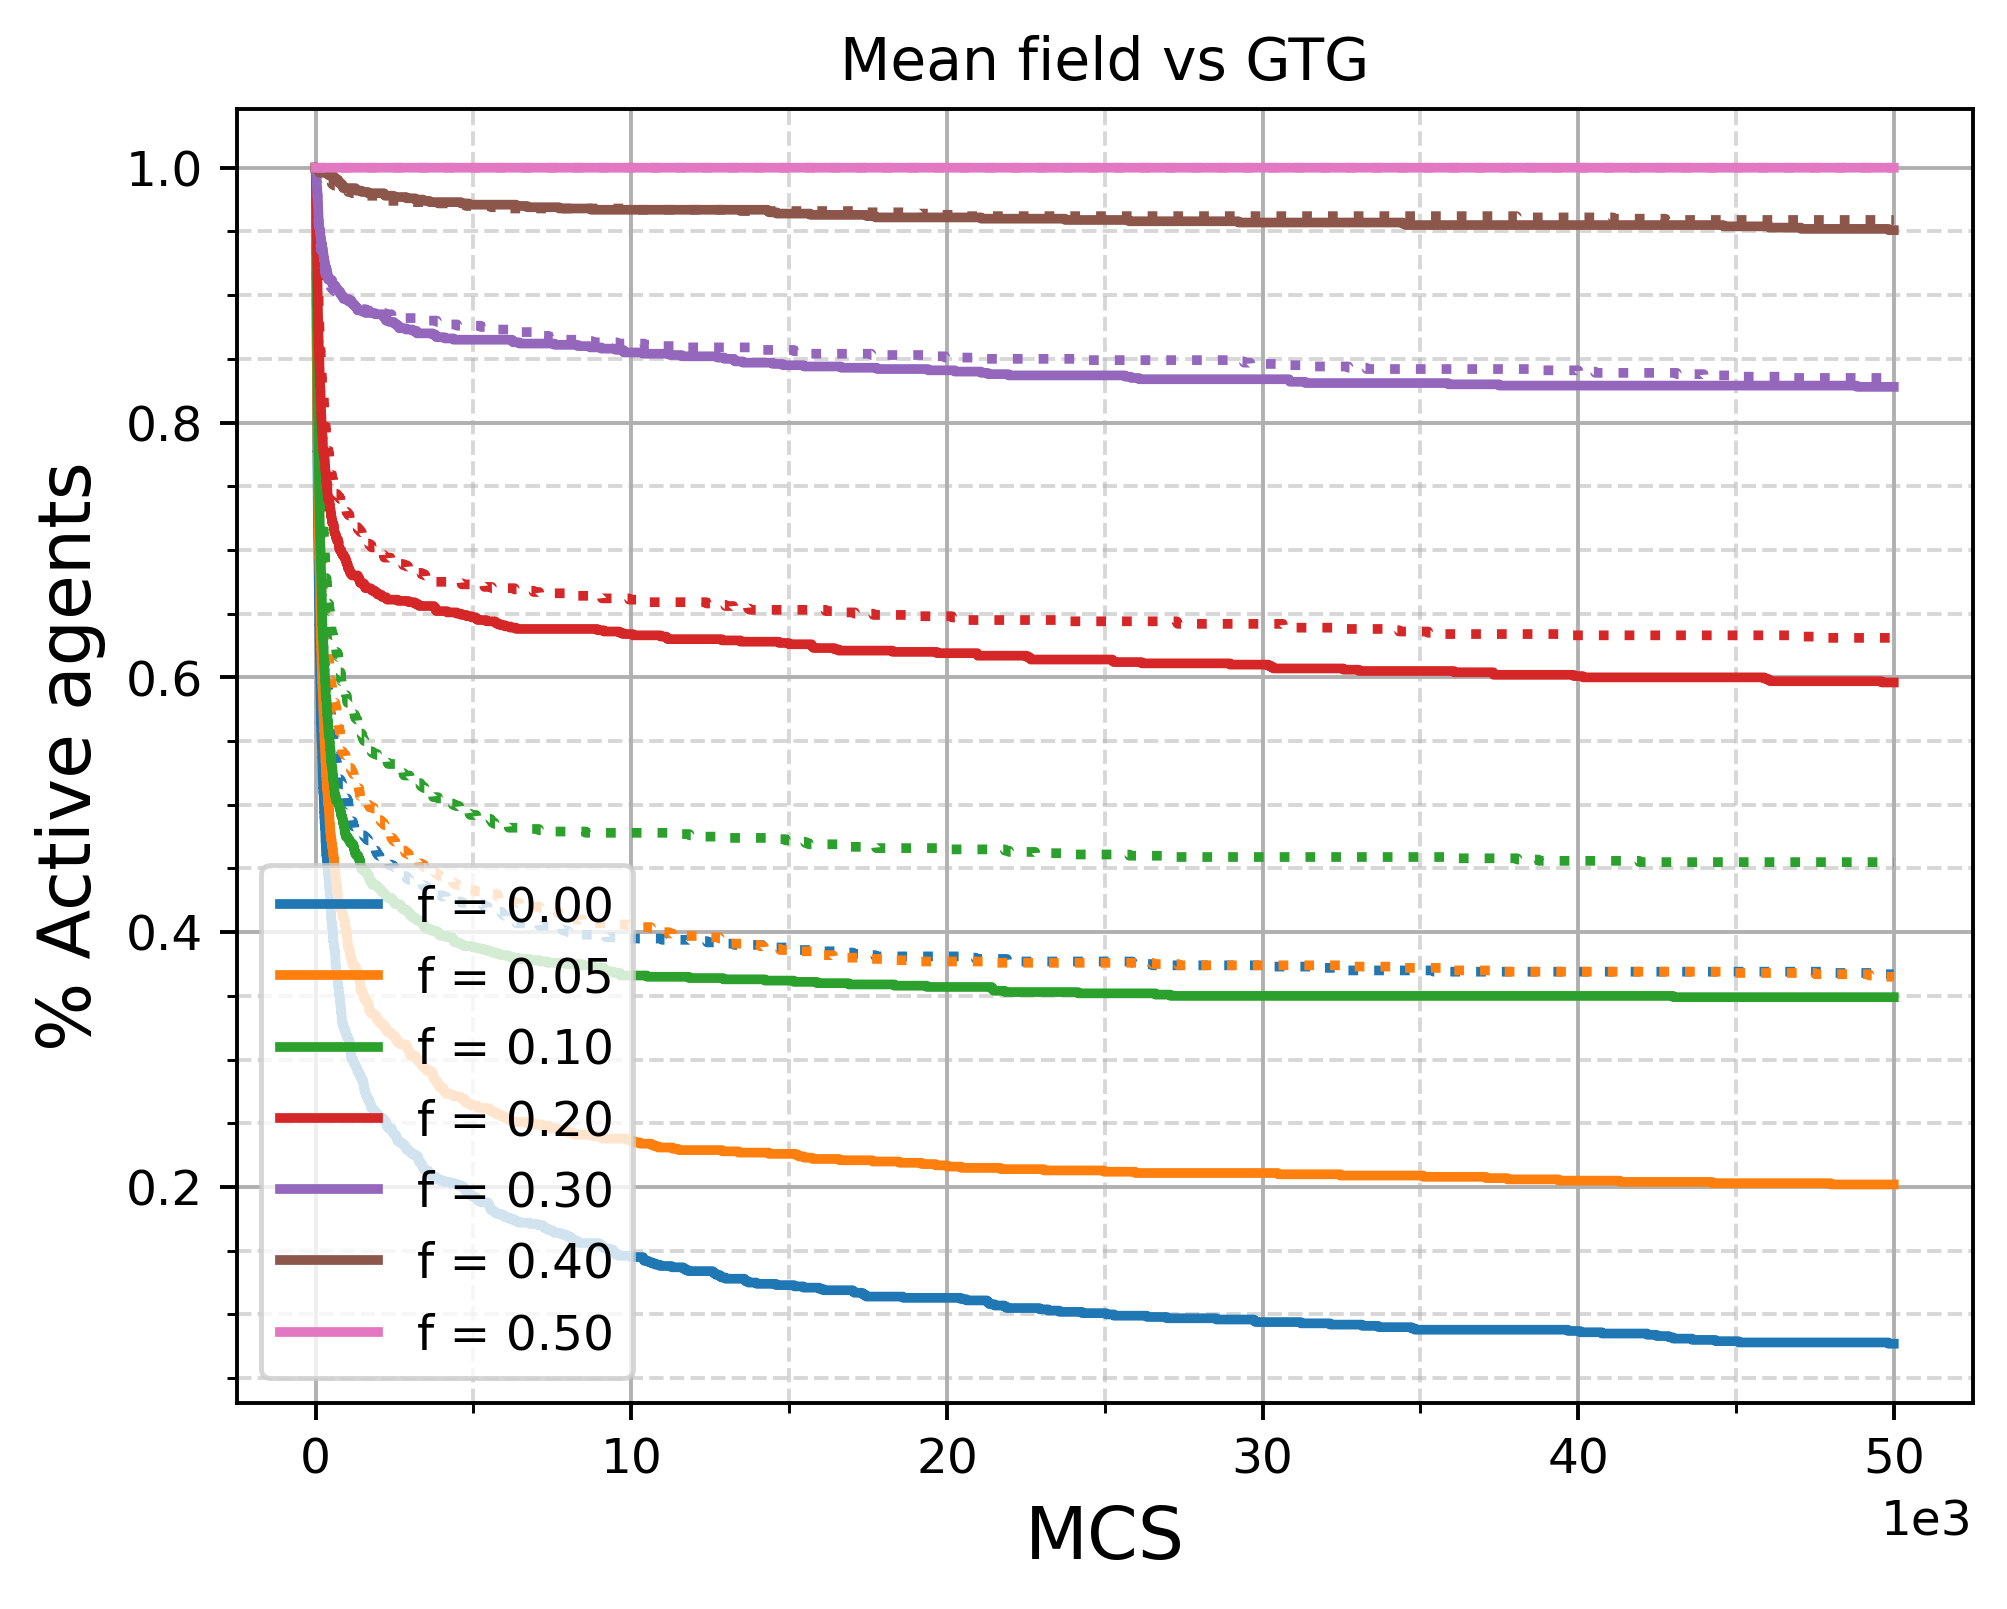

In [6]:
# Number of active agents
f_subset = [0, .1]
n_agents = int(1e+3)

fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('% Active agents', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
ax.set_title(label='Mean field vs GTG')

for f in f_set:
    path_active = os.path.join(filepath, 'f={:.2f}_active.npy'.format(f))
    active = np.load(path_active)
    path_active2 = os.path.join(filepath2, 'GTG_theta=1500_MCS=50000_f={:.2f}_active.npy'.format(f))
    active2 = np.load(path_active2)
    
    color = next(ax._get_lines.prop_cycler)['color']

    ax.plot(active[:50000]/n_agents, label='f = {:.2f}'.format(f),
            linewidth=2, color=color)
    ax.plot(active2/n_agents, linewidth=2, color=color, linestyle=':')
    
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath2, 'active_MFvsGTG.png'), format='png')

#### 2. Mean field vs BA

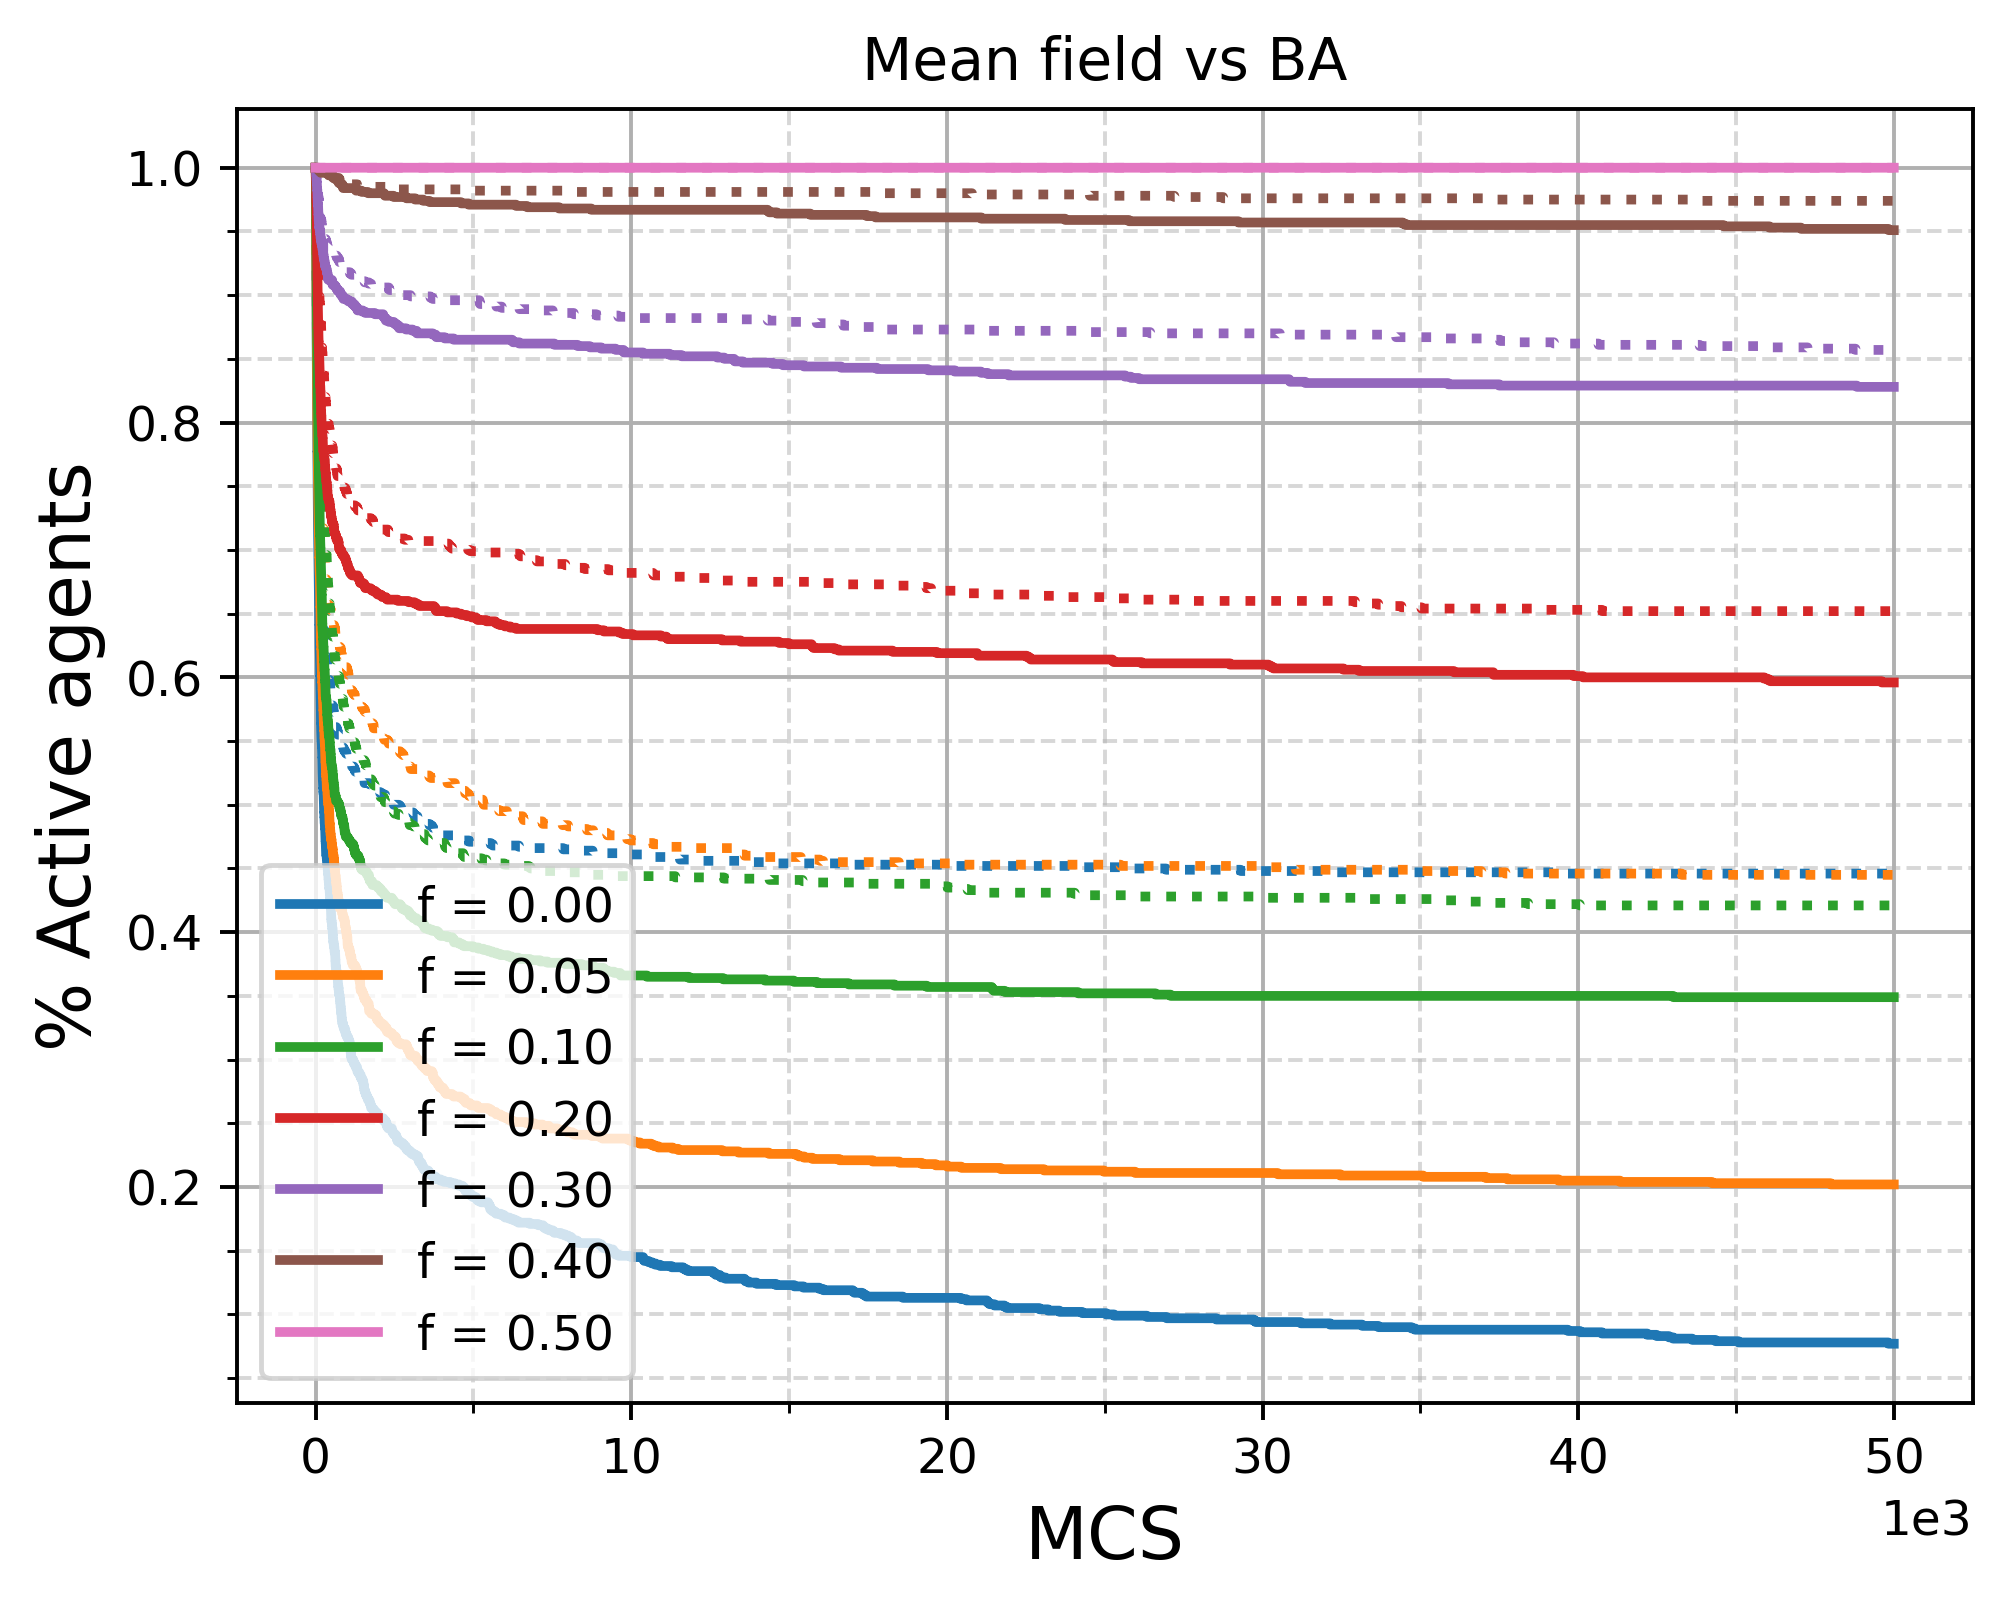

In [7]:
# Number of active agents
f_subset = [0, .1]
n_agents = int(1e+3)

fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('% Active agents', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
ax.set_title(label='Mean field vs BA')

for f in f_set:
    path_active = os.path.join(filepath, 'f={:.2f}_active.npy'.format(f))
    active = np.load(path_active)
    path_active3 = os.path.join(filepath2, 'BA_m=2_MCS=50000_f={:.2f}_active.npy'.format(f))
    active3 = np.load(path_active3)
    
    color = next(ax._get_lines.prop_cycler)['color']

    ax.plot(active[:50000]/n_agents, label='f = {:.2f}'.format(f),
            linewidth=2, color=color)
    ax.plot(active3/n_agents, linewidth=2, color=color, linestyle=':')
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath2, 'active_MFvsBA.png'), format='png')

#### 3. GTG vs BA

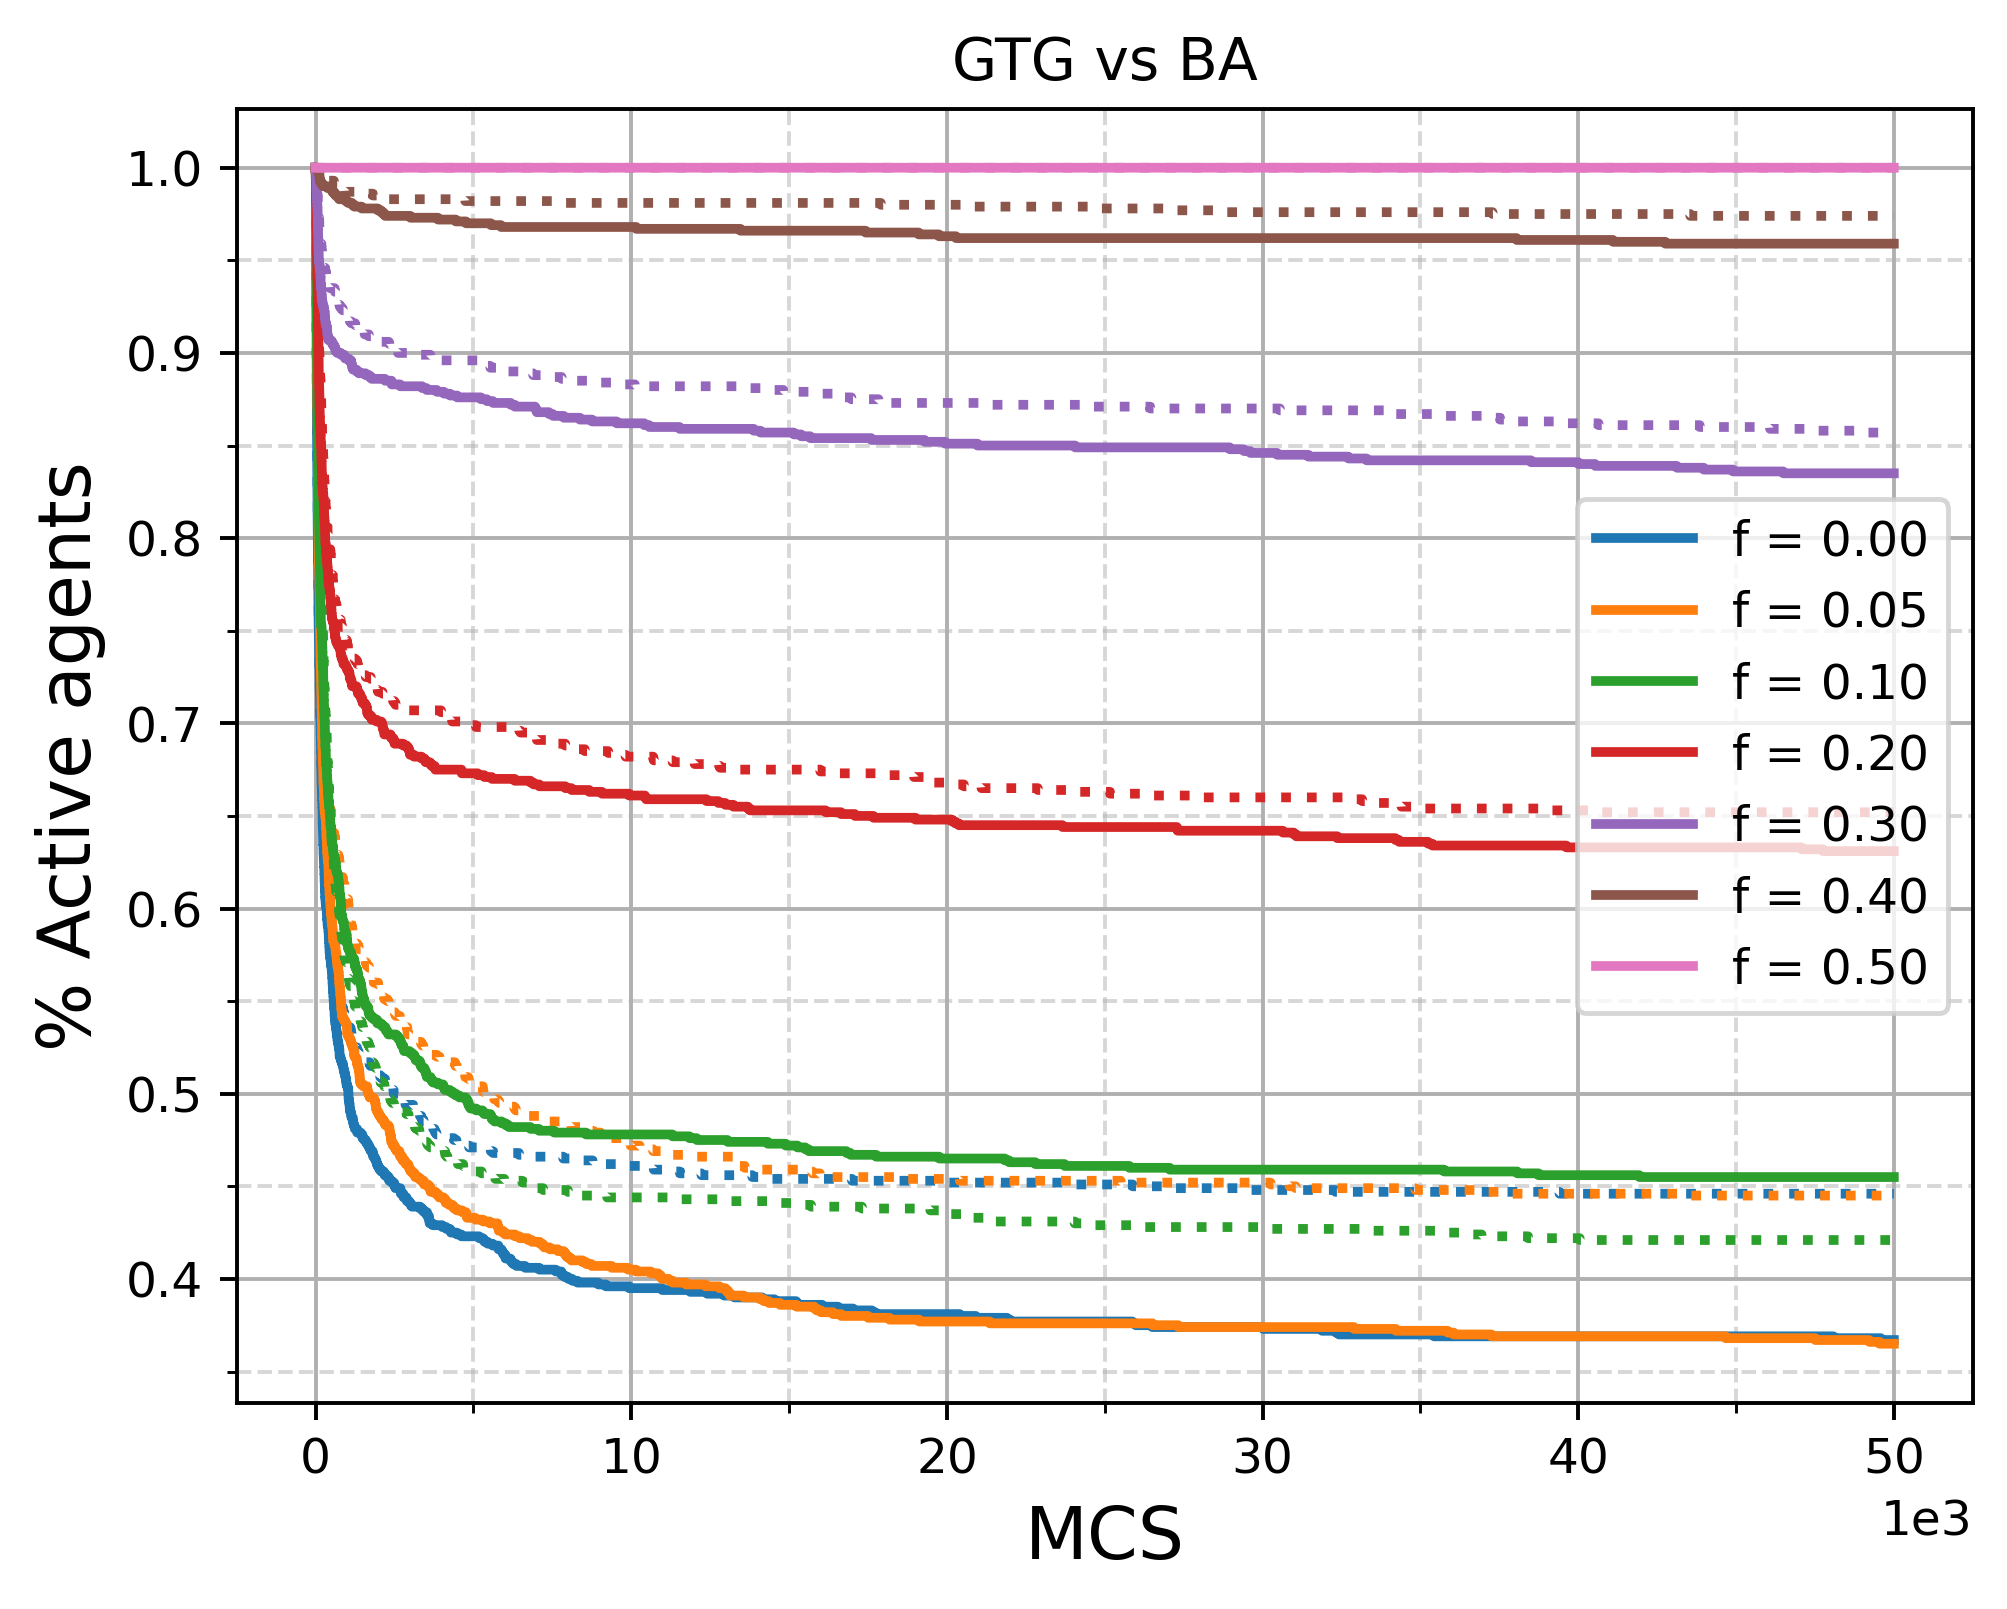

In [8]:
# Number of active agents
n_agents = int(1e+3)

fig, ax = plt.subplots()
fig.set_dpi(350)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('% Active agents', size=15)
ax.set_xticks(np.arange(0, 50000, 5000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)
ax.set_title(label='GTG vs BA')

for f in f_set:
    path_active2 = os.path.join(filepath2, 'GTG_theta=1500_MCS=50000_f={:.2f}_active.npy'.format(f))
    active2 = np.load(path_active2)
    path_active3 = os.path.join(filepath2, 'BA_m=2_MCS=50000_f={:.2f}_active.npy'.format(f))
    active3 = np.load(path_active3)
    
    color = next(ax._get_lines.prop_cycler)['color']

    ax.plot(active2/n_agents, label='f = {:.2f}'.format(f),
            linewidth=2, color=color)
    ax.plot(active3/n_agents, linewidth=2, color=color, linestyle=':')
    
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath2, 'active_GTGvsBA.png'), format='png')